In [70]:
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [136]:
# csv 파일을 pandas 데이터프레임으로 읽어오기 (올바른 인코딩 지정)
df = pd.read_excel('연령분포.xlsx', index_col=0)  # 또는 'cp949' 등 사용하는 인코딩으로 변경
df2 = df[df['지역명']=='경북']

# 군집화 개수
K = 12

def cluster_area(df, k):
    cluster_data = df[df['지역명']=='경북']
    cluster_data = cluster_data.drop(['읍면동 개수'], axis=1)

    # '시군구명'을 수치로 변환
    cluster_data['읍면동명_encoded'] = pd.Categorical(df['읍면동명']).codes
    
    age_gender_columns = ['0대남자', '0대여자', '10대남자', '10대여자', '20대남자', '20대여자', '30대남자', '30대여자',
                          '40대남자', '40대여자', '50대남자', '50대여자', '60대남자', '60대여자',
                          '70대남자', '70대여자', '80대남자', '80대여자', '90대남자', '90대여자']
    
    # drop
    cluster_data = cluster_data.drop(age_gender_columns, axis=1)

    age_total_columns = ['0대전체', '10대전체', '20대전체', '30대전체', '40대전체', '50대전체', '60대전체', '70대전체', '80대전체', '90대전체']
    

    age_groups = list(range(0, 91, 10))
    column_template = '{}대{}'

    # Iterate through age groups and create new columns
    for age in age_groups:
        male_column = f'{age}대남자'
        female_column = f'{age}대여자'
        total_column = column_template.format(age, '전체')
        
        # Create a new column for the total of each age group
        cluster_data['{}대전체'.format(age)] = df[male_column] + df[female_column]

    # cluster_data[age_total_columns] = cluster_data[age_total_columns].div(df['총인구'], axis=0)

    cluster_data['총인구'] = df['총인구']
    X = cluster_data[age_total_columns + ['총인구']]

    # K-평균 군집화
    num_clusters = k  # 군집의 개수를 원하는대로 설정
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_data['cluster'] = kmeans.fit_predict(X)
    df = pd.merge(df, cluster_data[['시군구명', '읍면동명', 'cluster']], on=['시군구명', '읍면동명'], how='inner')
    return df

df3 = cluster_area(df2, K)

df3

c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


,지역명,시군구명,읍면동명,읍면동 개수,0대남자,0대여자,10대남자,10대여자,20대남자,20대여자,...,60대남자,60대여자,70대남자,70대여자,80대남자,80대여자,90대남자,90대여자,총인구,cluster
0,경북,포항시 남구,구룡포읍,14.0,52,56,132,101,230,128,...,1027,955,541,758,271,521,17,71,7152,8
1,경북,포항시 남구,연일읍,14.0,1005,940,1819,1703,1911,1436,...,2386,2340,998,949,252,500,16,69,29857,1
2,경북,포항시 남구,오천읍,14.0,2524,2455,3251,2795,4079,2627,...,3605,3433,1337,1533,422,813,30,134,56002,9
3,경북,포항시 남구,대송면,14.0,25,27,65,53,131,93,...,537,459,251,281,76,175,2,36,3338,10
4,경북,포항시 남구,동해면,14.0,236,226,368,368,508,372,...,961,966,523,636,194,376,17,53,9681,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
338,경북,울진군,매화면,11.0,17,20,39,36,53,37,...,244,225,160,189,90,238,8,76,1978,0
339,경북,울릉군,울릉읍,4.0,133,122,159,184,388,247,...,678,609,338,376,122,167,7,29,6394,8
340,경북,울릉군,서면,4.0,21,15,28,15,43,21,...,111,80,51,66,25,51,3,7,909,0
341,경북,울릉군,서면태하출장소,4.0,9,4,10,5,13,7,...,59,58,43,34,16,24,6,11,446,0


# 확인

In [1]:
# df2 = df2.drop(['읍면동 개수'], axis=1)
df3

NameError: name 'df3' is not defined

In [135]:
df3.to_excel('df3_rrrrr.xlsx')

<Axes: xlabel='시군구명', ylabel='총인구'>

c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54252 (\N{HANGUL SYLLABLE PO}) missing from current font.
  func(*args, **kwargs)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54637 (\N{HANGUL SYLLABLE HANG}) missing from current font.
  func(*args, **kwargs)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  func(*args, **kwargs)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45224 (\N{HANGUL SYLLABLE NAM}) missing from current font.
  func(*args, **kwargs)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  func(*args, **kwargs)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packag

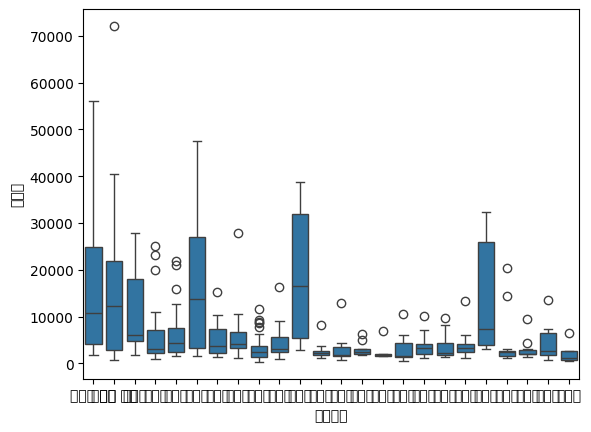

In [99]:
sns.boxplot(x='시군구명', y='총인구', data=df3)


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


       시군구명     읍면동명    총인구  cluster
0    포항시 남구     구룡포읍   7152        7
1    포항시 남구      연일읍  29857        6
2    포항시 남구      오천읍  56002        3
3    포항시 남구      대송면   3338        0
4    포항시 남구      동해면   9681        5
..      ...      ...    ...      ...
338     울진군      매화면   1978        8
339     울릉군      울릉읍   6394        7
340     울릉군       서면    909        8
341     울릉군  서면태하출장소    446        8
342     울릉군       북면   1289        8

[343 rows x 4 columns]


c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51064 (\N{HANGUL SYLLABLE IN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44396 (\N{HANGUL SYLLABLE GU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


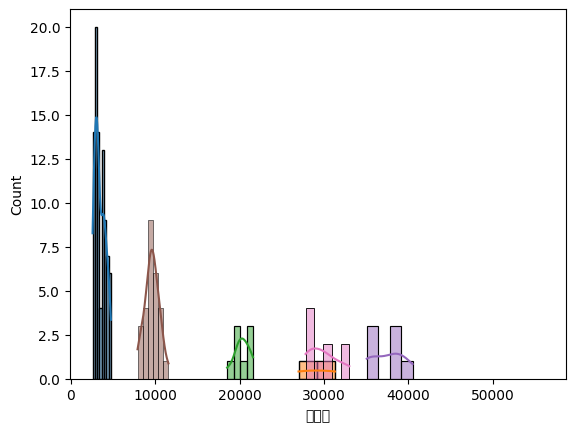

c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 49884 (\N{HANGUL SYLLABLE SI}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 44400 (\N{HANGUL SYLLABLE GUN}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 47749 (\N{HANGUL SYLLABLE MYEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 48143 (\N{HANGUL SYLLABLE MIC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\DCU\anaconda3\envs\preprocessing\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 50896 (\N{HANGUL SYLLABLE WEON}) missin

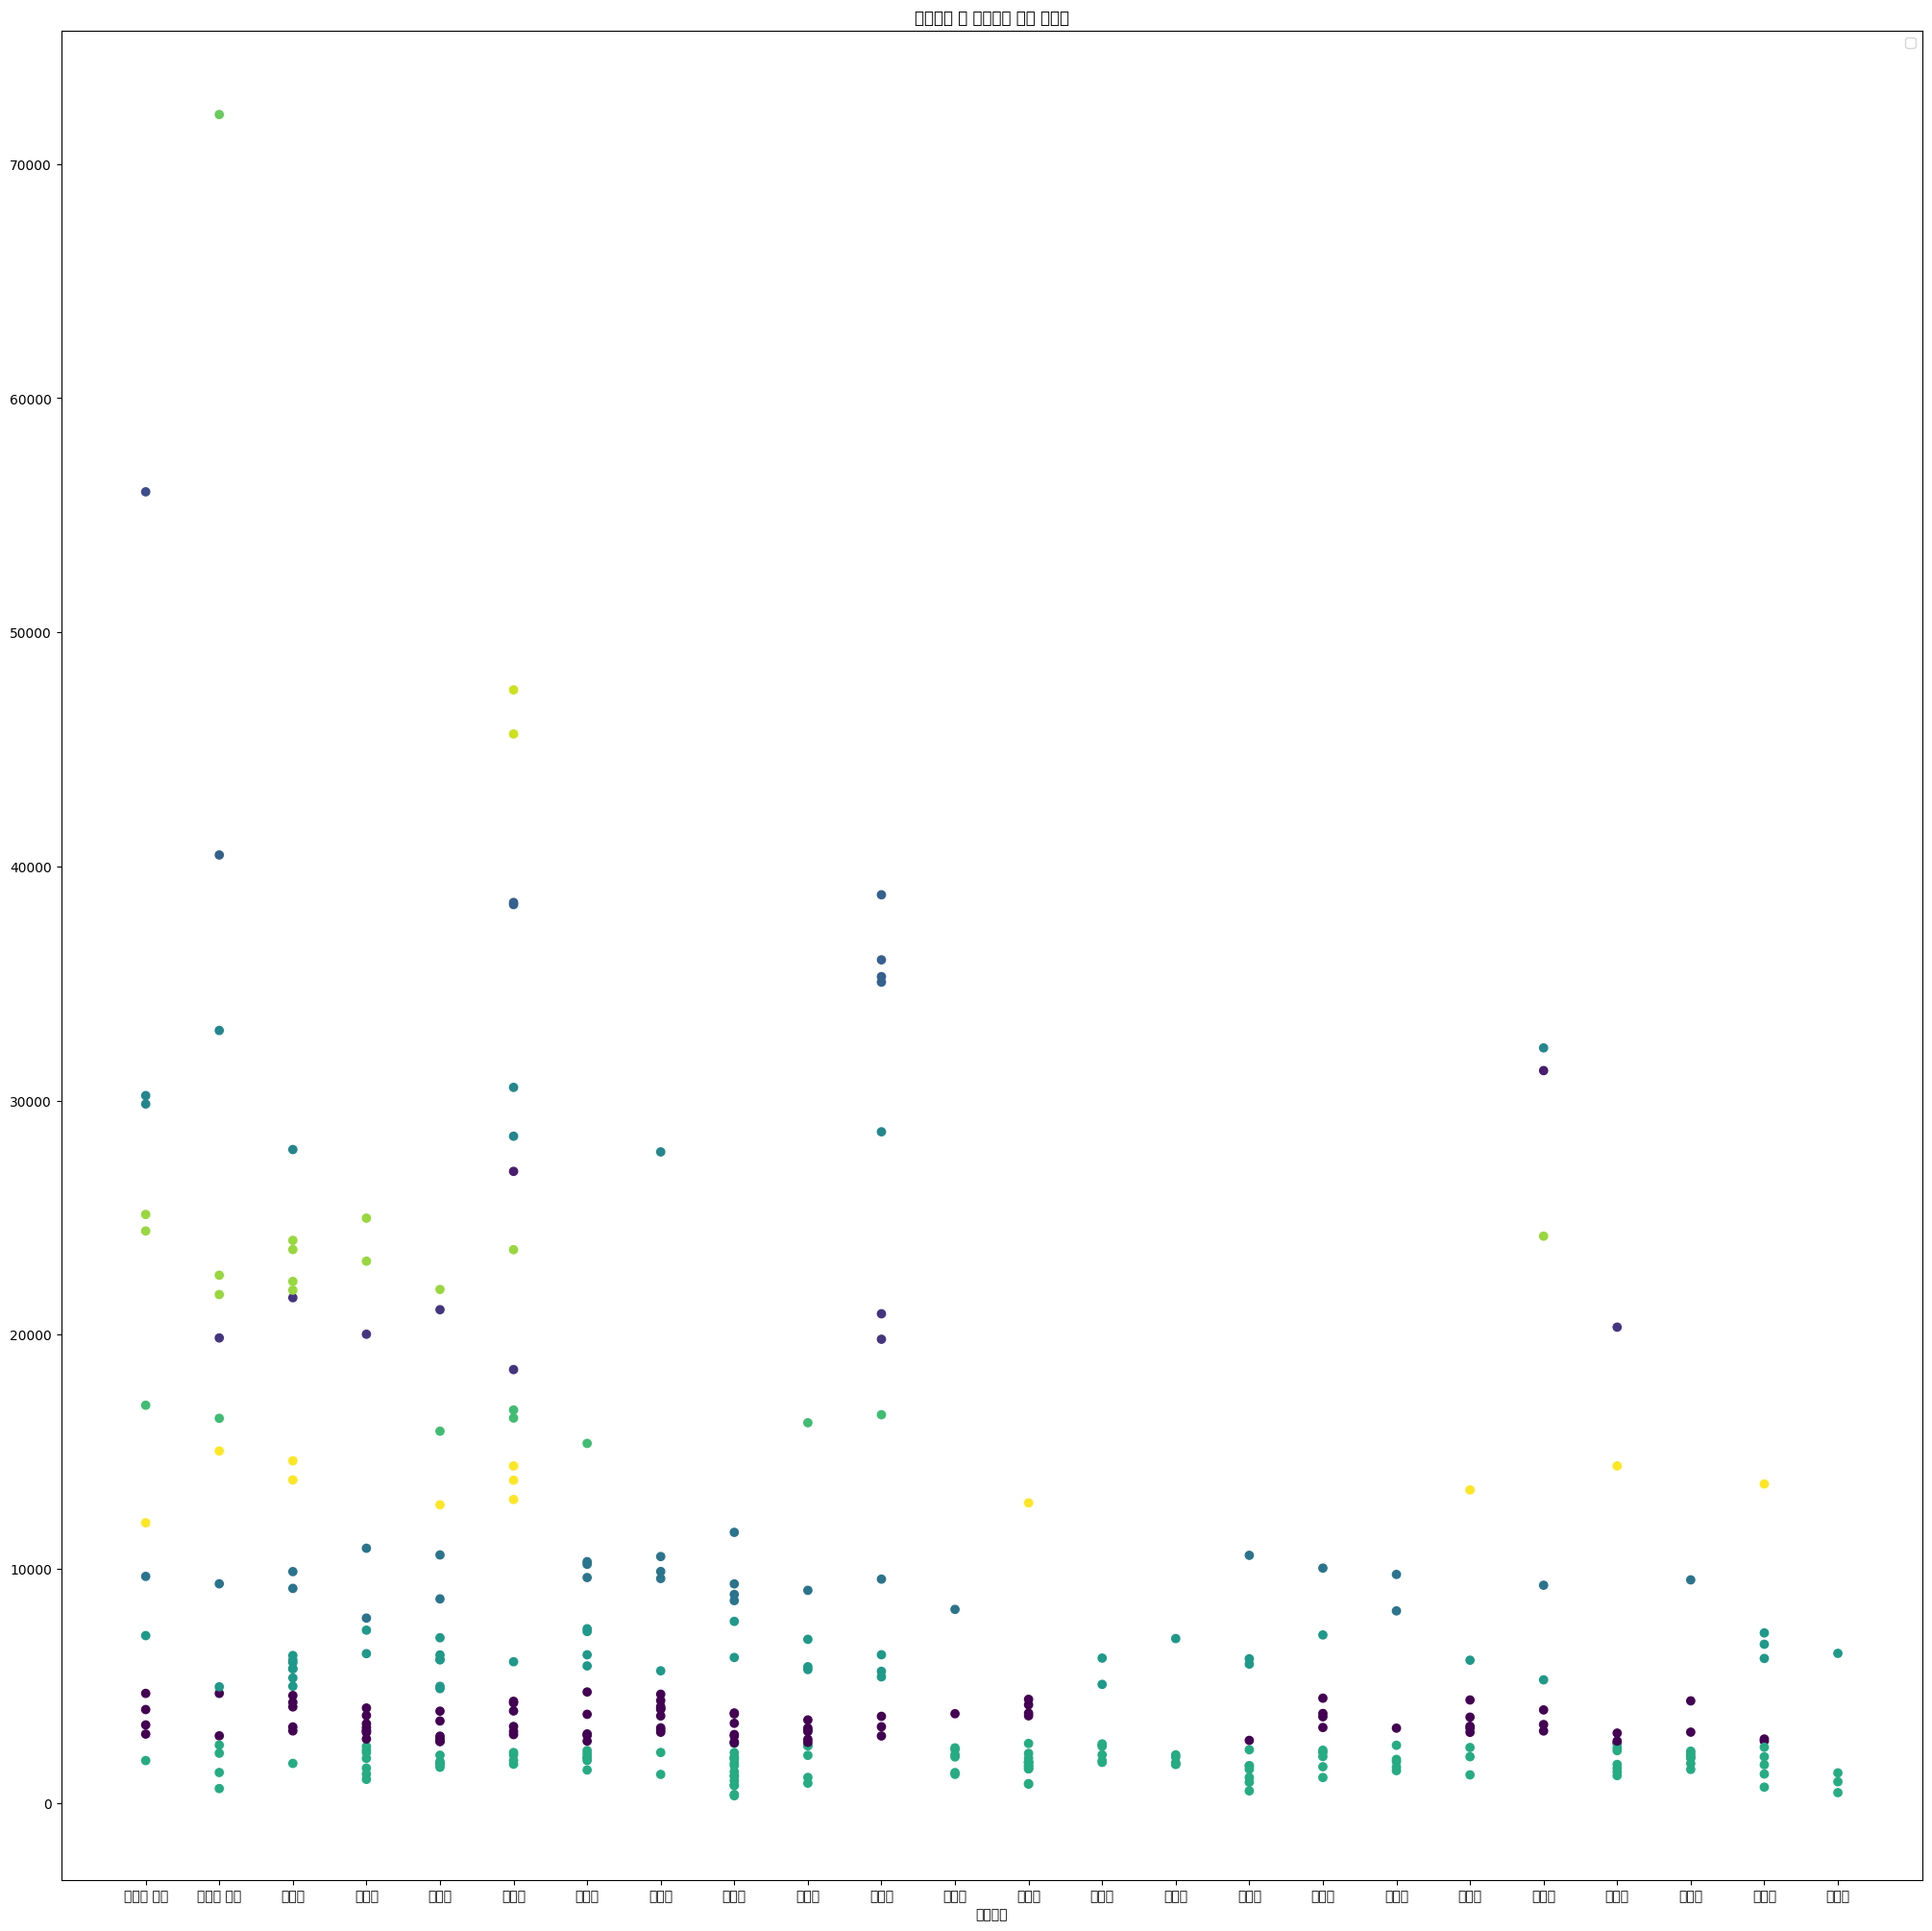

In [106]:
# 군집화 결과 확인
print(df3[['시군구명','읍면동명', '총인구', 'cluster']])

# 각 군집의 시군구명 및 주소 확인
for i in range(num_clusters):
    cluster_data = df3[df3['cluster'] == i]['총인구']
    sns.histplot(cluster_data, kde=True, label=f'cluster {i}')

# 시각화
plt.figure(figsize=(25, 25))    
plt.scatter(df3['시군구명'], df3['총인구'], c=df3['cluster'], cmap='viridis')
plt.xlabel('시군구명')
plt.ylabel('')
plt.title('시군구명 및 인원총합 기반 군집화')
plt.legend()
plt.show()

In [138]:
df3[df3['cluster']==0]

,지역명,시군구명,읍면동명,읍면동 개수,0대남자,0대여자,10대남자,10대여자,20대남자,20대여자,...,60대남자,60대여자,70대남자,70대여자,80대남자,80대여자,90대남자,90대여자,총인구,cluster
6,경북,포항시 남구,호미곶면,14.0,12,17,36,21,61,33,...,250,215,144,228,66,166,1,36,1815,0
17,경북,포항시 북구,송라면,16.0,15,24,33,39,73,62,...,330,320,218,270,96,227,9,49,2477,0
19,경북,포항시 북구,죽장면,16.0,17,15,28,17,35,18,...,326,323,201,200,111,224,9,30,2128,0
20,경북,포항시 북구,죽장면상옥출장소,16.0,2,5,7,6,8,16,...,105,115,62,51,29,44,3,6,620,0
21,경북,포항시 북구,기북면,16.0,5,10,26,14,25,22,...,199,184,122,135,53,132,9,21,1305,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
337,경북,울진군,금강송면,11.0,7,6,17,18,18,10,...,191,144,95,121,48,126,6,16,1240,0
338,경북,울진군,매화면,11.0,17,20,39,36,53,37,...,244,225,160,189,90,238,8,76,1978,0
340,경북,울릉군,서면,4.0,21,15,28,15,43,21,...,111,80,51,66,25,51,3,7,909,0
341,경북,울릉군,서면태하출장소,4.0,9,4,10,5,13,7,...,59,58,43,34,16,24,6,11,446,0


In [139]:
df3[df3['cluster']==9]

,지역명,시군구명,읍면동명,읍면동 개수,0대남자,0대여자,10대남자,10대여자,20대남자,20대여자,...,60대남자,60대여자,70대남자,70대여자,80대남자,80대여자,90대남자,90대여자,총인구,cluster
2,경북,포항시 남구,오천읍,14.0,2524,2455,3251,2795,4079,2627,...,3605,3433,1337,1533,422,813,30,134,56002,9


In [141]:
df3[df3['cluster']==2]

,지역명,시군구명,읍면동명,읍면동 개수,0대남자,0대여자,10대남자,10대여자,20대남자,20대여자,...,60대남자,60대여자,70대남자,70대여자,80대남자,80대여자,90대남자,90대여자,총인구,cluster
8,경북,포항시 남구,해도동,14.0,263,264,397,365,930,615,...,1861,2271,1146,1260,301,425,8,67,16991,2
22,경북,포항시 북구,중앙동,16.0,254,282,381,363,792,679,...,1513,1753,902,1122,334,557,18,90,15036,2
23,경북,포항시 북구,양학동,16.0,536,509,882,766,1081,826,...,1388,1437,520,588,146,240,8,51,16432,2
44,경북,경주시,성건동,23.0,207,159,443,384,1186,902,...,1146,1514,802,1047,274,503,24,79,13801,2
46,경북,경주시,선도동,23.0,509,473,853,751,1022,772,...,1005,970,428,590,199,346,13,56,14617,2
93,경북,안동시,태화동,24.0,402,404,474,429,723,574,...,1034,1239,649,791,284,424,16,75,12739,2
97,경북,안동시,송하동,24.0,758,656,841,787,1004,866,...,1040,1166,413,544,145,369,8,69,15882,2
99,경북,구미시,선산읍,25.0,384,374,540,545,746,482,...,1474,1423,692,827,311,657,25,145,14397,2
112,경북,구미시,형곡1동,25.0,439,416,827,670,949,745,...,1004,1030,382,402,97,199,8,24,13790,2
113,경북,구미시,형곡2동,25.0,385,363,917,782,1419,1092,...,1292,1283,362,408,81,203,6,24,16444,2


In [45]:
df2[df2['cluster']==3]

,지역명,시군구명,읍면동명,0대남자,0대여자,10대남자,10대여자,20대남자,20대여자,30대남자,...,60대여자,70대남자,70대여자,80대남자,80대여자,90대남자,90대여자,총인구,읍면동명_encoded,cluster
408,경북,포항시 북구,장량동,3687,3408,4738,4279,4825,3836,4772,...,4184,1444,1358,315,668,27,130,72115,242,3


In [46]:
df2[df2['cluster']==4]

,지역명,시군구명,읍면동명,0대남자,0대여자,10대남자,10대여자,20대남자,20대여자,30대남자,...,60대여자,70대남자,70대여자,80대남자,80대여자,90대남자,90대여자,총인구,읍면동명_encoded,cluster
380,경북,포항시 남구,구룡포읍,52,56,132,101,230,128,235,...,955,541,758,271,521,17,71,7152,26,4
384,경북,포항시 남구,동해면,236,226,368,368,508,372,497,...,966,523,636,194,376,17,53,9681,82,4
409,경북,포항시 북구,환여동,409,386,567,561,441,369,530,...,785,349,373,90,142,5,17,9365,322,4
410,경북,경주시,감포읍,73,63,117,111,188,111,183,...,646,370,548,182,369,22,69,5343,11,4
412,경북,경주시,건천읍,154,141,267,205,369,250,356,...,1065,705,795,291,612,26,87,9168,18,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
198,경북,봉화군,봉화읍,285,241,413,462,436,319,339,...,876,539,645,265,509,34,121,9532,107,4
210,경북,울진군,북면,384,377,253,202,434,266,566,...,438,218,235,101,221,2,46,6782,112,4
215,경북,울진군,죽변면,133,110,173,169,388,222,299,...,653,303,380,123,331,10,62,6176,256,4
216,경북,울진군,후포면,150,173,279,222,335,235,249,...,883,453,564,156,333,19,63,7267,329,4


In [47]:
df2[df2['cluster']==5]

,지역명,시군구명,읍면동명,0대남자,0대여자,10대남자,10대여자,20대남자,20대여자,30대남자,...,60대여자,70대남자,70대여자,80대남자,80대여자,90대남자,90대여자,총인구,읍면동명_encoded,cluster
382,경북,포항시 남구,오천읍,2524,2455,3251,2795,4079,2627,4212,...,3433,1337,1533,422,813,30,134,56002,191,5
0,경북,구미시,인동동,2069,1848,3095,2797,3836,2985,4285,...,2005,617,831,183,434,18,66,47543,230,5
2,경북,구미시,양포동,2955,2810,3517,3262,3484,2286,3846,...,1149,336,497,129,289,11,42,45659,179,5


In [48]:
df2[df2['cluster']==6]

,지역명,시군구명,읍면동명,0대남자,0대여자,10대남자,10대여자,20대남자,20대여자,30대남자,...,60대여자,70대남자,70대여자,80대남자,80대여자,90대남자,90대여자,총인구,읍면동명_encoded,cluster
381,경북,포항시 남구,연일읍,1005,940,1819,1703,1911,1436,1412,...,2340,998,949,252,500,16,69,29857,182,6
392,경북,포항시 남구,효곡동,1723,1653,2195,1883,1916,1324,1660,...,1910,648,466,96,183,4,52,30214,326,6
394,경북,포항시 북구,흥해읍,1824,1671,1908,1719,2251,1664,2422,...,3264,1440,1662,508,1153,41,190,40492,333,6
406,경북,포항시 북구,우창동,1587,1474,1681,1519,1859,1538,2325,...,2612,863,1053,206,552,15,90,32997,212,6
480,경북,구미시,고아읍,1787,1674,2082,1786,2501,1865,2419,...,2415,760,930,310,739,34,144,38464,21,6
491,경북,구미시,선주원남동,1650,1561,2596,2311,2696,2314,2373,...,2091,613,709,192,379,15,78,38373,147,6
498,경북,구미시,상모사곡동,1274,1251,1804,1737,2589,1924,2363,...,1195,349,438,122,251,12,43,30566,132,6
84,경북,경산시,진량읍,1027,941,1585,1581,2975,2216,2125,...,2152,1026,1383,444,859,46,104,35297,272,6
94,경북,경산시,서부1동,1106,1200,1864,1964,2052,1939,1775,...,2728,1149,1537,467,817,34,125,35061,137,6
95,경북,경산시,서부2동,1870,1888,1455,1459,2275,2006,2552,...,2435,1048,1279,366,627,33,76,36013,138,6


In [41]:
df2.to_excel('clustering연령분포.xlsx',index = False)